## Preliminary data analysis:

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn import preprocessing
import math

/Users/Alex/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data=pd.read_csv("/Users/Alex/Desktop/ML_project/train.csv")
data.head()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

data_without_dummy=data[['bond_id','trade_price','weight','current_coupon','time_to_maturity','is_callable',
 'reporting_delay','trade_size','trade_type','curve_based_price','received_time_diff_last1','trade_price_last1',
 'trade_size_last1','trade_type_last1','curve_based_price_last1','received_time_diff_last2','trade_price_last2',
 'trade_size_last2','trade_type_last2','curve_based_price_last2','received_time_diff_last3',
 'trade_price_last3','trade_size_last3','trade_type_last3','curve_based_price_last3','received_time_diff_last4',
 'trade_price_last4','trade_size_last4','trade_type_last4','curve_based_price_last4','received_time_diff_last5',
 'trade_price_last5','trade_size_last5','trade_type_last5','curve_based_price_last5','received_time_diff_last6',
 'trade_price_last6','trade_size_last6','trade_type_last6','curve_based_price_last6','received_time_diff_last7',
 'trade_price_last7','trade_size_last7','trade_type_last7','curve_based_price_last7','received_time_diff_last8',
 'trade_price_last8','trade_size_last8','trade_type_last8','curve_based_price_last8','received_time_diff_last9',
 'trade_price_last9','trade_size_last9','trade_type_last9','curve_based_price_last9','received_time_diff_last10',
 'trade_price_last10','trade_size_last10','trade_type_last10','curve_based_price_last10']]
data_without_dummy=data_without_dummy.dropna()

In [4]:
#checking if the cathegorical variables are balanced:
tt2=np.mean(data["trade_type"]==2)
tt3=np.mean(data["trade_type"]==3)
tt4=np.mean(data["trade_type"]==4)

tt2_last1=np.mean(data["trade_type_last1"]==2)
tt3_last1=np.mean(data["trade_type_last1"]==3)
tt4_last1=np.mean(data["trade_type_last1"]==4)

tt2_last2=np.mean(data["trade_type_last2"]==2)
tt3_last2=np.mean(data["trade_type_last2"]==3)
tt4_last2=np.mean(data["trade_type_last2"]==4)

tt2_last3=np.mean(data["trade_type_last3"]==2)
tt3_last3=np.mean(data["trade_type_last3"]==3)
tt4_last3=np.mean(data["trade_type_last3"]==4)

tt2_last4=np.mean(data["trade_type_last4"]==2)
tt3_last4=np.mean(data["trade_type_last4"]==3)
tt4_last4=np.mean(data["trade_type_last4"]==4)

tt2_last5=np.mean(data["trade_type_last5"]==2)
tt3_last5=np.mean(data["trade_type_last5"]==3)
tt4_last5=np.mean(data["trade_type_last5"]==4)

tt2_last6=np.mean(data["trade_type_last6"]==2)
tt3_last6=np.mean(data["trade_type_last6"]==3)
tt4_last6=np.mean(data["trade_type_last6"]==4)

tt2_last7=np.mean(data["trade_type_last7"]==2)
tt3_last7=np.mean(data["trade_type_last7"]==3)
tt4_last7=np.mean(data["trade_type_last7"]==4)

tt2_last8=np.mean(data["trade_type_last8"]==2)
tt3_last8=np.mean(data["trade_type_last8"]==3)
tt4_last8=np.mean(data["trade_type_last8"]==4)

tt2_last9=np.mean(data["trade_type_last9"]==2)
tt3_last9=np.mean(data["trade_type_last9"]==3)
tt4_last9=np.mean(data["trade_type_last9"]==4)

tt2_last10=np.mean(data["trade_type_last10"]==2)
tt3_last10=np.mean(data["trade_type_last10"]==3)
tt4_last10=np.mean(data["trade_type_last10"]==4)

d={"Cathegories":["2","3","4"],"trade_type":[tt2,tt3,tt4],"trade_type_last1":[tt2_last1,tt3_last1,tt4_last1],
      "trade_type_last2":[tt2_last2,tt3_last2,tt4_last2],"trade_type_last3":[tt2_last3,tt3_last3,tt4_last3],
      "trade_type_last4":[tt2_last4,tt3_last4,tt4_last4],"trade_type_last5":[tt2_last5,tt3_last5,tt4_last5],
      "trade_type_last6":[tt2_last6,tt3_last6,tt4_last6],"trade_type_last7":[tt2_last7,tt3_last7,tt4_last7],
      "trade_type_last8":[tt2_last8,tt3_last8,tt4_last8],"trade_type_last9":[tt2_last9,tt3_last9,tt4_last9],
      "trade_type_last10":[tt2_last10,tt3_last10,tt4_last10]}
Balance_summary=pd.DataFrame(d)
Balance_summary.set_index("Cathegories",inplace=True)
Balance_summary


,trade_type,trade_type_last1,trade_type_last10,trade_type_last2,trade_type_last3,trade_type_last4,trade_type_last5,trade_type_last6,trade_type_last7,trade_type_last8,trade_type_last9
Cathegories,,,,,,,,,,,
2,0.203465,0.203934,0.197841,0.203134,0.202451,0.201810,0.201128,0.200448,0.199804,0.199102,0.198473
3,0.361293,0.360796,0.352744,0.359785,0.358833,0.357935,0.357021,0.356163,0.355284,0.354450,0.353587
4,0.435243,0.435270,0.426711,0.434459,0.433511,0.432491,0.431561,0.430598,0.429620,0.428672,0.427692


#### From the results above, one can see that type 4 trades are far more frequent than type 2 trades accross all the cathegorical variables. One may consider adjusting the error weights to account for this assymetry in the data. 

### Distribution of Financial data:
The paper claims that financial data in this paper (Prices of different bonds) has normal variability (Page 3 under title Generalized Linear Models). To get to this conclusion, the authors fitted an unweighted generalized linear model (OLS in this case) on the entire data set using two link functions: Normal and Gamma. The OLS with the normal link function is reported to lead to a lower error on test as well as on training sets. We will investigate this claim and check its validity using shapiro normality tests.       

In [5]:
# We need to code the cathegorical variables as dummies to procceed further. this is especially important for PCA
d=pd.get_dummies(data,columns=['trade_type','trade_type_last1','trade_type_last2','trade_type_last3','trade_type_last4',
                                'trade_type_last5','trade_type_last6','trade_type_last7','trade_type_last8',
                               'trade_type_last9','trade_type_last10'])
#Get rid of the raws with NaN's
d=d.dropna()
X=d[['weight','current_coupon','time_to_maturity','is_callable','reporting_delay','trade_size','curve_based_price',
 'received_time_diff_last1','trade_price_last1','trade_size_last1','curve_based_price_last1','received_time_diff_last2',
 'trade_price_last2','trade_size_last2','curve_based_price_last2','received_time_diff_last3','trade_price_last3',
 'trade_size_last3','curve_based_price_last3','received_time_diff_last4','trade_price_last4','trade_size_last4',
 'curve_based_price_last4','received_time_diff_last5','trade_price_last5','trade_size_last5','curve_based_price_last5',
 'received_time_diff_last6','trade_price_last6','trade_size_last6','curve_based_price_last6','received_time_diff_last7',
 'trade_price_last7','trade_size_last7','curve_based_price_last7','received_time_diff_last8','trade_price_last8',
 'trade_size_last8','curve_based_price_last8','received_time_diff_last9','trade_price_last9','trade_size_last9',
 'curve_based_price_last9','received_time_diff_last10','trade_price_last10','trade_size_last10','curve_based_price_last10',
 'trade_type_2','trade_type_3','trade_type_4','trade_type_last1_2','trade_type_last1_3','trade_type_last1_4',
 'trade_type_last2_2.0','trade_type_last2_3.0','trade_type_last2_4.0','trade_type_last3_2.0','trade_type_last3_3.0',
 'trade_type_last3_4.0','trade_type_last4_2.0','trade_type_last4_3.0','trade_type_last4_4.0','trade_type_last5_2.0',
 'trade_type_last5_3.0','trade_type_last5_4.0','trade_type_last6_2.0','trade_type_last6_3.0','trade_type_last6_4.0',
 'trade_type_last7_2.0','trade_type_last7_3.0','trade_type_last7_4.0','trade_type_last8_2.0','trade_type_last8_3.0',
 'trade_type_last8_4.0','trade_type_last9_2.0','trade_type_last9_3.0','trade_type_last9_4.0','trade_type_last10_2.0',
 'trade_type_last10_3.0','trade_type_last10_4.0']]

y=d["trade_price"]
# init dataframes
train_df_list = []; test1_df_list = []; test2_df_list = [];

# Populate dataframes
for bondID in sorted(list(set(d.bond_id.tolist()))):
    
    df = d[d['bond_id'] == bondID]
    N  = len(df)
    
    train_df_list.append( df.iloc[:int(np.floor(0.7*N)), :] )
    test1_df_list.append( df.iloc[int(np.floor(0.7*N)):int(np.floor(0.85*N)), :] )
    test2_df_list.append( df.iloc[int(np.floor(0.85*N)):, :] )

train_df = pd.concat(train_df_list)
test1_df = pd.concat(test1_df_list)
test2_df = pd.concat(test2_df_list)

In [6]:
y_train = train_df.trade_price; X_train = train_df.drop('trade_price', axis=1)
y_test1 = test1_df.trade_price; X_test1 = test1_df.drop('trade_price', axis=1)
y_test2 = test2_df.trade_price; X_test2 = test2_df.drop('trade_price', axis=1)
y_train2 = pd.concat([y_train,y_test1]); X_train2 = pd.concat([X_train, X_test1])

#### Use `X_train` to fit model
#### GLM model with Gamma link function:

In [7]:
lmout_gamma = sm.GLM(y_train,X_train, family=sm.families.Gamma()).fit()
print(lmout_gamma.summary())

/Users/Alex/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trade_price   No. Observations:               519990
Model:                            GLM   Df Residuals:                   519918
Model Family:                   Gamma   Df Model:                           71
Link Function:          inverse_power   Scale:                0.00158856481776
Method:                          IRLS   Log-Likelihood:            -1.7231e+06
Date:                Thu, 03 May 2018   Deviance:                       1631.0
Time:                        20:52:44   Pearson chi2:                     826.
No. Iterations:                     4                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                         4.427e-11   4.03e-12     10.976      0.000    3.64e-11    5.22e-11
bond_id

#### GLM model with Gaussian link function:

In [8]:
lmout_Gaussian = sm.GLM(y_train,X_train, family=sm.families.Gaussian()).fit()
print(lmout_Gaussian.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            trade_price   No. Observations:               519990
Model:                            GLM   Df Residuals:                   519918
Model Family:                Gaussian   Df Model:                           71
Link Function:               identity   Scale:                  0.841844715484
Method:                          IRLS   Log-Likelihood:            -6.9304e+05
Date:                Thu, 03 May 2018   Deviance:                   4.3769e+05
Time:                        20:53:37   Pearson chi2:                 4.38e+05
No. Iterations:                     2                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                          1.96e-08   9.88e-09      1.984      0.047    2.36e-10     3.9e-08
bond_id

In [9]:
yhat_Gaussian_train=lmout_Gaussian.predict(X_train)
yhat_Gamma_train=lmout_gamma.predict(X_train)

yhat_Gaussian_test=lmout_Gaussian.predict(X_test1)
yhat_Gamma_test=lmout_gamma.predict(X_test1)

In [10]:
#WEPS is a function to calculate the weighted errors (Metric used by the authors of the paper)
def WEPS(w,y_hat,y):
    return((w*(y_hat-y)**2).sum()/w.sum()) 
w_train=X_train["weight"]
w_test=X_test1["weight"]

WEPS_Gaussian_train=WEPS(w_train,yhat_Gaussian_train,y_train)
WEPS_Gamma_train=WEPS(w_train,yhat_Gamma_train,y_train)

WEPS_Gaussian_test=WEPS(w_test,yhat_Gaussian_test,y_test1)
WEPS_Gamma_test=WEPS(w_test,yhat_Gamma_test,y_test1)

#Summary:
d={"Link Function":["Gamma","Gaussian"],"Train":[WEPS_Gamma_train,WEPS_Gaussian_train],
   "Test":[WEPS_Gamma_test,WEPS_Gaussian_test]}
summary=pd.DataFrame(d)
summary.set_index("Link Function",inplace=True)
summary

,Test,Train
Link Function,,
Gamma,17.189291,14.600495
Gaussian,1.375771,1.907660


#### Use `X_train` and `X_test1` to fit model
#### GLM model with Gamma link function:

In [11]:
lmout_gamma = sm.GLM(y_train2,X_train2, family=sm.families.Gamma()).fit()
print(lmout_gamma.summary())

/Users/Alex/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trade_price   No. Observations:               631681
Model:                            GLM   Df Residuals:                   631609
Model Family:                   Gamma   Df Model:                           71
Link Function:          inverse_power   Scale:                0.00164216749625
Method:                          IRLS   Log-Likelihood:            -2.1658e+06
Date:                Thu, 03 May 2018   Deviance:                       2251.2
Time:                        20:57:44   Pearson chi2:                 1.04e+03
No. Iterations:                     4                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                         4.785e-11   3.72e-12     12.868      0.000    4.06e-11    5.51e-11
bond_id

#### GLM model with Gaussian link function:

In [12]:
lmout_Gaussian = sm.GLM(y_train2,X_train2, family=sm.families.Gaussian()).fit()
print(lmout_Gaussian.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            trade_price   No. Observations:               631681
Model:                            GLM   Df Residuals:                   631609
Model Family:                Gaussian   Df Model:                           71
Link Function:               identity   Scale:                  0.809409086271
Method:                          IRLS   Log-Likelihood:            -8.2950e+05
Date:                Thu, 03 May 2018   Deviance:                   5.1123e+05
Time:                        20:58:53   Pearson chi2:                 5.11e+05
No. Iterations:                     2                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                         1.768e-08   8.79e-09      2.012      0.044    4.54e-10    3.49e-08
bond_id

In [13]:
yhat_Gaussian_train=lmout_Gaussian.predict(X_train2)
yhat_Gamma_train=lmout_gamma.predict(X_train2)

yhat_Gaussian_test=lmout_Gaussian.predict(X_test2)
yhat_Gamma_test=lmout_gamma.predict(X_test2)

w_train2=X_train2["weight"]
w_test2=X_test2["weight"]

WEPS_Gaussian_train=WEPS(w_train2,yhat_Gaussian_train,y_train2)
WEPS_Gamma_train=WEPS(w_train2,yhat_Gamma_train,y_train2)

WEPS_Gaussian_test=WEPS(w_test2,yhat_Gaussian_test,y_test2)
WEPS_Gamma_test=WEPS(w_test2,yhat_Gamma_test,y_test2)

#Summary:
d={"Link Function":["Gamma","Gaussian"],"Train":[WEPS_Gamma_train,WEPS_Gaussian_train],
   "Test":[WEPS_Gamma_test,WEPS_Gaussian_test]}
summary=pd.DataFrame(d)
summary.set_index("Link Function",inplace=True)
summary

,Test,Train
Link Function,,
Gamma,19.754114,15.088251
Gaussian,1.392550,1.813348


The results summarized on the table above confirm that if we use the weighted Error in Prediction per Sample (WEPS) as a metric to convey the errors, GLM with the Gaussian Link function gives much better results than the one with the Gamma link function. This also implies that the weighted residual errors are normally distributed. We will investigate this further by making a normality plot for weighted residuals and will also use the shapiro normality test. 

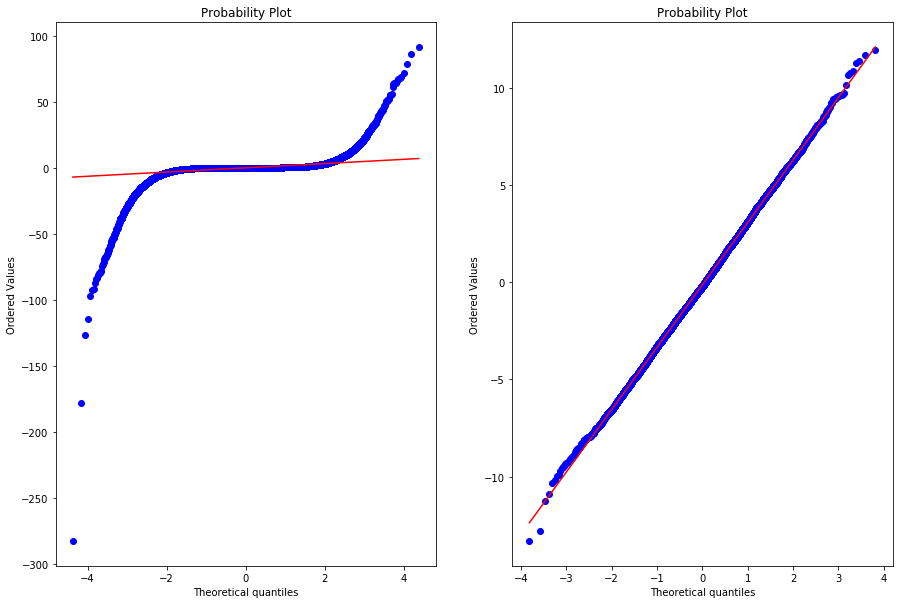

In [14]:
#We are using the test set here
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)
weighted_residuals_Gaussian=(yhat_Gaussian_test-y_test2)*w_test2
plt.subplot(1, 2 ,1)
a=stats.probplot(weighted_residuals_Gaussian, dist="norm", plot=pylab)
mu=np.mean(weighted_residuals_Gaussian)
sigma=np.std(weighted_residuals_Gaussian)
norm_sample= np.random.normal(mu,sigma,size=10000) 
plt.subplot(1, 2,2)
b=stats.probplot(norm_sample, dist="norm", plot=pylab)

plt.show()


### Comments:
#### Left Graph:Probability plot of our weighted residual errors using Gaussian Link function
#### Right Graph: Probability plot of a sample of 1000 normaly distributed variable with the same sample mean and standard deviation as our Weighted residual errors.

One can see that the the graph on the left has a much heavier tail than the normally distributed variable. We conclude that the distribution of  wieghted residual errors obtained from a GLM with gaussian link function have a much heavier tail than a normally distributed variable with same mu and sigma.

#### Normality test:

In [15]:
stats.mstats.normaltest(weighted_residuals_Gaussian)

NormaltestResult(statistic=200555.13852592336, pvalue=0.0)

In [16]:
stats.mstats.normaltest(norm_sample)

NormaltestResult(statistic=2.4697317969042887, pvalue=0.2908737663748458)

The result of the qqplot is confirmed by the normality test. p-value is 0 so we reject the null hypothesis that states that the distribution of the weighted_residuals is gaussian.

#### Fitted_Values vs. Residuals:

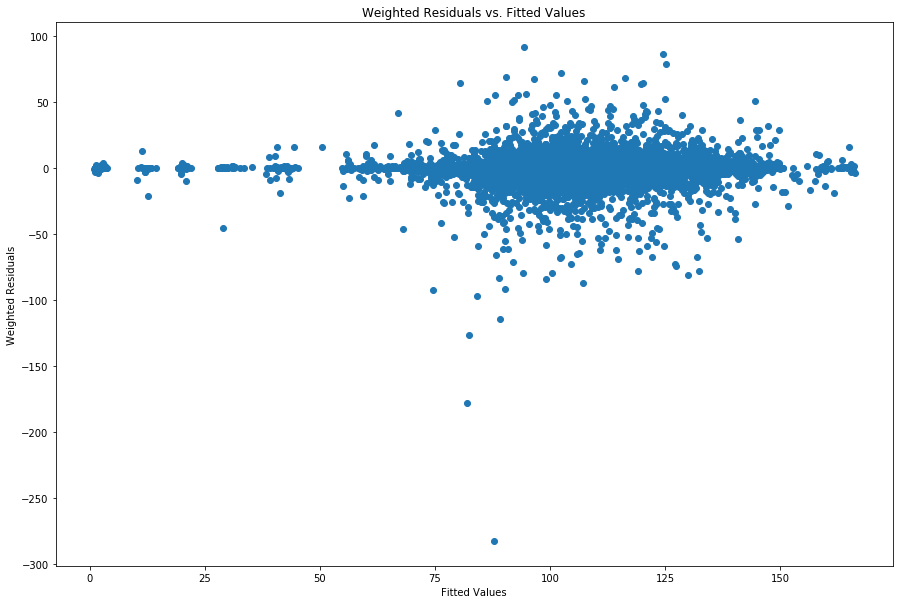

In [17]:
plt.scatter(yhat_Gaussian_test,weighted_residuals_Gaussian)
plt.title("Weighted Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Weighted Residuals")
plt.show()

From the plot above, there should be a concern about heteroskedasticity. Although it does not bias our coefficients, It alters the acuracy of our standard errors. We will explore this issue later.

### PCA Analysis:

#### PCA based on linear Distances:

In [18]:
from sklearn import decomposition
pca=sk.decomposition.PCA(whiten=True,svd_solver="randomized")
res_reg=pca.fit(X_train) 

In [19]:
np.set_printoptions(precision=6, threshold=None, edgeitems=None, linewidth=None,suppress=True)
print(np.array(res_reg.explained_variance_ratio_))

[ 0.209962  0.157069  0.135372  0.08018   0.066941  0.056999  0.050023
  0.044022  0.039507  0.035869  0.033358  0.030851  0.029104  0.012915
  0.008319  0.002846  0.001532  0.001262  0.001003  0.000734  0.000605
  0.000534  0.000502  0.000491  0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.      ]


Comment:
according to PCA, We need 22 prin comp to capture almost 100% of the variability. 

In [20]:
#Unfortunately Kernel PCA kills this session! My RAM is not as powerful to run a poly PCA

#### Exploring variable importance using Random forest:
This is on a sample of first 1000 rows just to make sure that it works

In [21]:
import rpy2
%load_ext rpy2.ipython
yy=np.asarray(y_train)
yy=yy.astype(float)
X_train=X_train.astype(float)
x_sub=X_train[0:1000]
yy_sub=yy[0:1000]

In [22]:
%%capture
%%R -i X_train -i x_sub -i yy -i yy_sub 
library(randomForest)
fitrfR = randomForest(x_sub,yy_sub,nodesize=10,ntree=200)
fitrfR

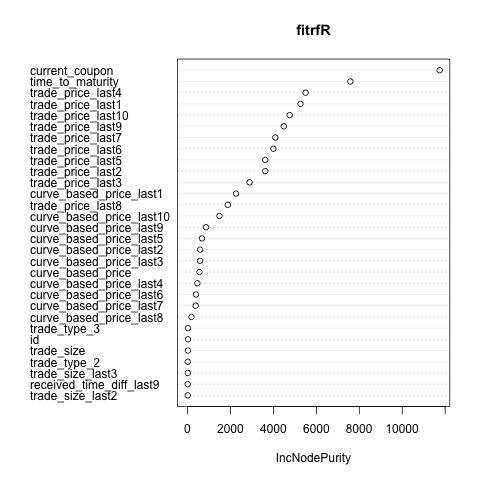

In [23]:
%%R
varImpPlot(fitrfR)

#### Exploring data using Lasso:

In [24]:
from sklearn.linear_model import LassoCV

## Use X_train to fit the model

In [25]:
lasso_out=LassoCV(normalize=True, cv=5,  random_state=1).fit(X_train,y_train)

/Users/Alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [26]:
from itertools import compress
all_coef=list(X_train)
fil = (lasso_out.coef_!=0).tolist()
list(compress(all_coef, fil))

['time_to_maturity',
 'reporting_delay',
 'trade_size',
 'curve_based_price',
 'received_time_diff_last1',
 'trade_price_last1',
 'trade_size_last1',
 'trade_price_last2',
 'trade_price_last3',
 'trade_price_last4',
 'trade_price_last5',
 'trade_price_last6',
 'trade_price_last7',
 'trade_price_last8',
 'trade_price_last9',
 'trade_price_last10',
 'trade_type_2',
 'trade_type_3',
 'trade_type_last1_2',
 'trade_type_last1_3',
 'trade_type_last2_2.0',
 'trade_type_last2_3.0',
 'trade_type_last3_2.0',
 'trade_type_last3_3.0',
 'trade_type_last4_2.0',
 'trade_type_last4_3.0',
 'trade_type_last5_2.0',
 'trade_type_last5_3.0',
 'trade_type_last6_2.0',
 'trade_type_last6_3.0',
 'trade_type_last7_2.0',
 'trade_type_last7_3.0',
 'trade_type_last8_2.0',
 'trade_type_last8_3.0',
 'trade_type_last9_2.0',
 'trade_type_last9_3.0',
 'trade_type_last10_2.0',
 'trade_type_last10_3.0']

#### Comment:
LassoCV uses 38 covariates
Regression Random forest importance plot indicates that 21 covariates are important
PCA returns 22 Principal components necessary to capture 99.9% of the variability

In [27]:
yhat_train=lasso_out.predict(X_train)
yhat_test=lasso_out.predict(X_test1)

#### WEPS analysis:

In [28]:
WEPS_lasso_train=WEPS(w_train,yhat_train,y_train)
WEPS_lasso_test=WEPS(w_test,yhat_test,y_test1)
#Summary:
d={"Method":["Lasso"],"train":[WEPS_lasso_train],"test":[WEPS_lasso_test]}
summary=pd.DataFrame(d)
summary.set_index("Method",inplace=True)
summary

,test,train
Method,,
Lasso,1.419194,1.977281


## Use `X_train` and `X_test1` to fit model

In [29]:
lasso_out=LassoCV(normalize=True, cv=5,  random_state=1).fit(X_train2,y_train2)

/Users/Alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [30]:
from itertools import compress
all_coef=list(X_train)
fil = (lasso_out.coef_!=0).tolist()
list(compress(all_coef, fil))

['time_to_maturity',
 'reporting_delay',
 'trade_size',
 'curve_based_price',
 'received_time_diff_last1',
 'trade_price_last1',
 'trade_price_last2',
 'trade_price_last3',
 'trade_price_last4',
 'trade_price_last5',
 'trade_price_last6',
 'trade_price_last7',
 'trade_price_last8',
 'trade_price_last9',
 'trade_price_last10',
 'trade_type_2',
 'trade_type_3',
 'trade_type_last1_2',
 'trade_type_last1_3',
 'trade_type_last2_2.0',
 'trade_type_last2_3.0',
 'trade_type_last3_2.0',
 'trade_type_last3_3.0',
 'trade_type_last4_2.0',
 'trade_type_last4_3.0',
 'trade_type_last5_2.0',
 'trade_type_last5_3.0',
 'trade_type_last6_2.0',
 'trade_type_last6_3.0',
 'trade_type_last7_2.0',
 'trade_type_last7_3.0',
 'trade_type_last8_2.0',
 'trade_type_last8_3.0',
 'trade_type_last9_2.0',
 'trade_type_last9_3.0',
 'trade_type_last10_2.0',
 'trade_type_last10_3.0']

In [31]:
# Predicting
yhat_train=lasso_out.predict(X_train2)
yhat_test=lasso_out.predict(X_test2)

In [32]:
WEPS_lasso_train=WEPS(w_train2,yhat_train,y_train2)
WEPS_lasso_test=WEPS(w_test2,yhat_test,y_test2)
#Summary:
d={"Method":["Lasso"],"train":[WEPS_lasso_train],"test":[WEPS_lasso_test]}
summary=pd.DataFrame(d)
summary.set_index("Method",inplace=True)
summary

,test,train
Method,,
Lasso,1.441694,1.881139


# Boosted Trees

In [33]:
import xgboost as xgb

In [63]:
#xgboost uses its own matrix format (in all languages) so we need to cast our data.
#This can be done directly from a text file with xgb.DMatrix
#Here we will dump the values from the pandas objects
train_dm = xgb.DMatrix(X_train.values, y_train)
test_dm = xgb.DMatrix(X_test1.values, y_test1)
train_dm2=xgb.DMatrix(X_train2.values, y_train2)
test_dm2 = xgb.DMatrix(X_test2.values, y_test2)

In [41]:
#Parameters
param = {'eval_metric':'rmse',
         'eta':0.3,
         'seed':1,
         'max_depth':6,
         
        }


cvres = xgb.cv(param, train_dm, 50)

## Use X_train to fit the model

In [59]:
best_round=np.argmin(cvres["test-rmse-mean"])
bst = xgb.train(param, train_dm, best_round)

In [62]:
yhat_train=bst.predict(train_dm)
yhat_test=bst.predict(test_dm)


WEPS_lasso_train=WEPS(w_train,yhat_train,y_train)
WEPS_lasso_test=WEPS(w_test,yhat_test,y_test1)
#Summary:
d={"Method":["bst"],"train":[WEPS_lasso_train],"test":[WEPS_lasso_test]}
summary=pd.DataFrame(d)
summary.set_index("Method",inplace=True)
summary

,test,train
Method,,
Lasso,1.326801,1.36586


## Use `X_train` and `X_test1` to fit model

In [64]:
#Parameters
param = {'eval_metric':'rmse',
         'eta':0.3,
         'seed':1,
         'max_depth':6,
         
        }


cvres = xgb.cv(param, train_dm2, 50)

In [65]:
best_round=np.argmin(cvres["test-rmse-mean"])
bst = xgb.train(param, train_dm2, best_round)

In [66]:
yhat_train=bst.predict(train_dm2)
yhat_test=bst.predict(test_dm2)


WEPS_lasso_train=WEPS(w_train2,yhat_train,y_train2)
WEPS_lasso_test=WEPS(w_test2,yhat_test,y_test2)
#Summary:
d={"Method":["bst"],"train":[WEPS_lasso_train],"test":[WEPS_lasso_test]}
summary=pd.DataFrame(d)
summary.set_index("Method",inplace=True)
summary

,test,train
Method,,
bst,1.314589,1.36146
